In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [2]:
import time
import matplotlib.pyplot as plt

learning_times_kernel = {}
learning_times_c = {}
learning_times_gamma = {}

In [3]:
import numpy as np

indexes = np.random.randint(70000, size=7000)

xtrain = mnist.data[indexes][:4900]
xtest = mnist.data[indexes][4900:]

ytrain = mnist.target[indexes][:4900]
ytest = mnist.target[indexes][4900:]

# xtrain = mnist.data[:49000]
# xtest = mnist.data[49000:]

# ytrain = mnist.target[:49000]
# ytest = mnist.target[49000:]

In [4]:
from sklearn.svm import SVC

clf = SVC(kernel="linear", gamma="auto")

clf.fit(xtrain, ytrain)

found_classes = clf.predict(xtest)

print("Score train : " + str(clf.score(xtrain, ytrain)))
print("Score test : " + str(clf.score(xtest, ytest)))

for itest in range(1,20):
    #itest = 4
    
    res =  " OK" if ytest[itest] == found_classes[itest] else ""

    print("Classe : " + ytest[itest] + " / Attendu " + found_classes[itest] + res)



Score train : 1.0
Score test : 0.9128571428571428
Classe : 6 / Attendu 6 OK
Classe : 7 / Attendu 4
Classe : 0 / Attendu 0 OK
Classe : 0 / Attendu 0 OK
Classe : 1 / Attendu 1 OK
Classe : 3 / Attendu 3 OK
Classe : 2 / Attendu 2 OK
Classe : 9 / Attendu 4
Classe : 9 / Attendu 9 OK
Classe : 0 / Attendu 0 OK
Classe : 5 / Attendu 5 OK
Classe : 7 / Attendu 7 OK
Classe : 8 / Attendu 8 OK
Classe : 7 / Attendu 7 OK
Classe : 8 / Attendu 8 OK
Classe : 7 / Attendu 2
Classe : 9 / Attendu 9 OK
Classe : 4 / Attendu 4 OK
Classe : 4 / Attendu 9


In [5]:
from sklearn.metrics import zero_one_loss



scores_kernel_test = []
scores_kernel_train = []
times = []
erreurs = []

# "precomputed" ne fonctionne pas avec ce jeu de données
kernels = ["linear", "poly", "rbf", "sigmoid"]

for kernel in kernels:
    clf = SVC(kernel=kernel, gamma="auto")

    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times.append(exec_time)

    score_test = clf.score(xtest, ytest)
    scores_kernel_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_kernel_train.append(score_train)
    
    ypredict = clf.predict(xtest)
    erreurs.append(zero_one_loss(ytest, ypredict))
    
    print("Kernel (score test) : " + str(kernel) + " -> " + str(score_test))
    print("Kernel (score_train): " + str(kernel) + " -> " + str(score_train))


Kernel (score test) : linear -> 0.9128571428571428
Kernel (score_train): linear -> 1.0
Kernel (score test) : poly -> 0.95
Kernel (score_train): poly -> 1.0
Kernel (score test) : rbf -> 0.15904761904761905
Kernel (score_train): rbf -> 1.0
Kernel (score test) : sigmoid -> 0.11333333333333333
Kernel (score_train): sigmoid -> 0.11122448979591837


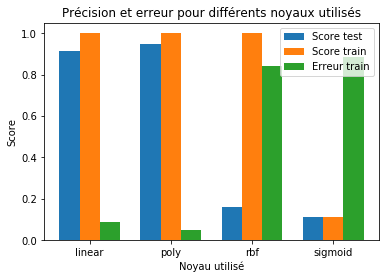

In [6]:
import numpy as np

    
N = 4


ind = np.arange(N) 
width = 0.25       
plt.bar(ind, scores_kernel_test, width, label="Score test")
plt.bar(ind + width, scores_kernel_train, width, label="Score train")
plt.bar(ind + width * 2, erreurs, width, label="Erreur train")

plt.xlabel("Noyau utilisé")
plt.ylabel("Score")
plt.title("Précision et erreur pour différents noyaux utilisés")
plt.xticks(ind + width, ('linear', 'poly', 'rbf', 'sigmoid'))
plt.legend(loc='best')

No handles with labels found to put in legend.


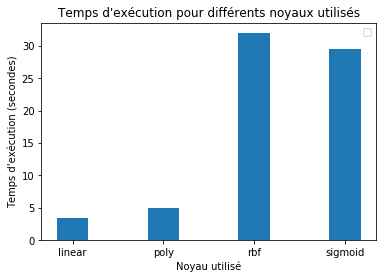

In [7]:
import numpy as np

    
N = 4


ind = np.arange(N) 
width = 0.35       
plt.bar(ind, times, width)

plt.xlabel("Noyau utilisé")
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Temps d'exécution pour différents noyaux utilisés")
plt.xticks(ind, ('linear', 'poly', 'rbf', 'sigmoid'))
plt.legend(loc='best')

In [8]:
import numpy as np

scores_c_test = []
scores_c_train = []
times = []
erreurs = []

Cs = np.linspace(0.1, 1, 5)

for C in Cs:
    
    clf = SVC(kernel="poly", gamma="auto", C=C)
    
    start_time = time.process_time()
    clf.fit(xtrain, ytrain)
    exec_time = time.process_time() - start_time
    times.append(exec_time)
    
    score_test = clf.score(xtest, ytest)
    scores_c_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    scores_c_train.append(score_train)
    
    ypredict = clf.predict(xtest)
    erreurs.append(zero_one_loss(ytest, ypredict))
    
    print("C : " + str(C) + " -> " + str(score_test) + " (test)")
    print("C : " + str(C) + " -> " + str(score_train) + " (train)")
    
    

C : 0.1 -> 0.95 (test)
C : 0.1 -> 1.0 (train)
C : 0.325 -> 0.95 (test)
C : 0.325 -> 1.0 (train)
C : 0.55 -> 0.95 (test)
C : 0.55 -> 1.0 (train)
C : 0.775 -> 0.95 (test)
C : 0.775 -> 1.0 (train)
C : 1.0 -> 0.95 (test)
C : 1.0 -> 1.0 (train)


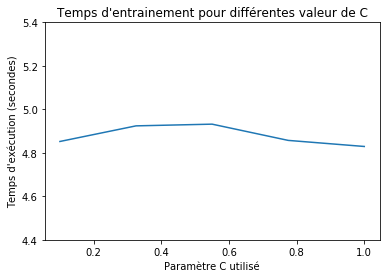

Text(0.5, 1.0, 'Score pour différents C')

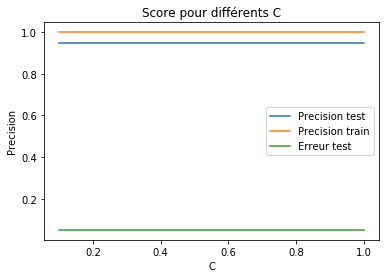

In [9]:

plt.ylim(4.4, 5.4)

plt.plot([x for x in np.linspace(0.1, 1, 5)], times)

plt.xlabel("Paramètre C utilisé")
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Temps d'entrainement pour différentes valeur de C")

plt.show()


plt.plot([x for x in Cs], scores_c_test)
plt.plot([x for x in Cs], scores_c_train)
plt.plot([x for x in Cs], erreurs)


plt.legend(['Precision test', 'Precision train', "Erreur test"], loc='best')
plt.xlabel("C")
plt.ylabel("Precision")
plt.title("Score pour différents C")

Text(0.5, 1.0, 'Score pour différents C')

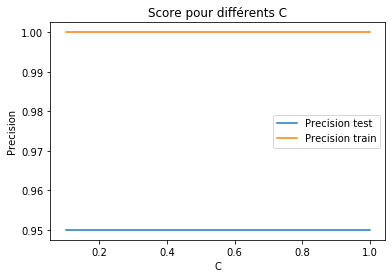

In [10]:
import matplotlib.pyplot as plt

plt.plot([x for x in Cs], scores_c_test)
plt.plot([x for x in Cs], scores_c_train)

plt.legend(['Precision test', 'Precision train'], loc='best')
plt.xlabel("C")
plt.ylabel("Precision")
plt.title("Score pour différents C")

In [11]:
from sklearn.metrics import confusion_matrix

clf = SVC(kernel="poly", gamma="auto")

clf.fit(xtrain, ytrain)

found_classes = clf.predict(xtest)

cm = confusion_matrix(ytest, found_classes)

print(cm)

[[201   0   0   0   0   2   0   0   2   1]
 [  0 226   0   1   0   0   0   0   1   1]
 [  2   1 180   2   1   0   1   2   0   0]
 [  0   3   1 201   0   2   0   3   2   2]
 [  1   2   0   0 189   0   1   0   0   2]
 [  0   2   2   6   0 175   2   0   3   0]
 [  1   0   2   0   0   0 196   0   0   0]
 [  0   3   1   1   2   1   0 227   0   3]
 [  1   6   2   1   1   4   1   1 193   1]
 [  2   2   1   2   8   1   0   5   1 207]]
